In [ ]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
!pip install imageio
import imageio
from PIL import Image as img
from PIL import Image
from numpy import asarray
from google.colab.patches import cv2_imshow

**Đảo ảnh**: cải thiện các chi tiết màu trắng hay màu xám nằm trong vùng tối của ảnh

In [ ]:
def dao_anh(img):
    return 255-img

def show_dao_anh():
    fig = plt.figure(figsize=(16, 9))
    ax1, ax2 = fig.subplots(1, 2)

    img = cv.imread('paris.jpg',0)
    ax1.imshow(img, cmap='gray')
    ax1.set_title("ảnh gốc")

    y = dao_anh(img)
    ax2.imshow(y, cmap='gray')
    ax2.set_title("ảnh đảo")
    plt.show()

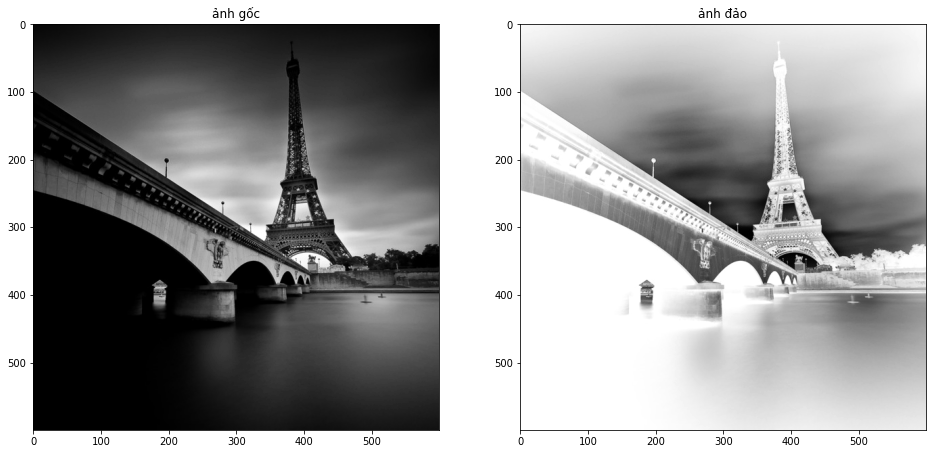

In [ ]:
show_dao_anh()

Cắt Ngưỡng: chuyển ảnh đa cấp xám về 2 giá trị mức xám

In [ ]:
def catNguong(img,th):
    return img > th #th ngưỡng

def show_anh_cat_nguong():
    fig = plt.figure(figsize=(16, 9))
    ax1, ax2 = fig.subplots(1, 2)

    img = cv.imread('keodan_dau.tif',0)
    ax1.imshow(img, cmap='gray')
    ax1.set_title("Ảnh gốc")

    y = catNguong(img,th=117)
    ax2.imshow(y, cmap='gray')
    ax2.set_title("Ảnh đã chuyển đổi")
    plt.show()

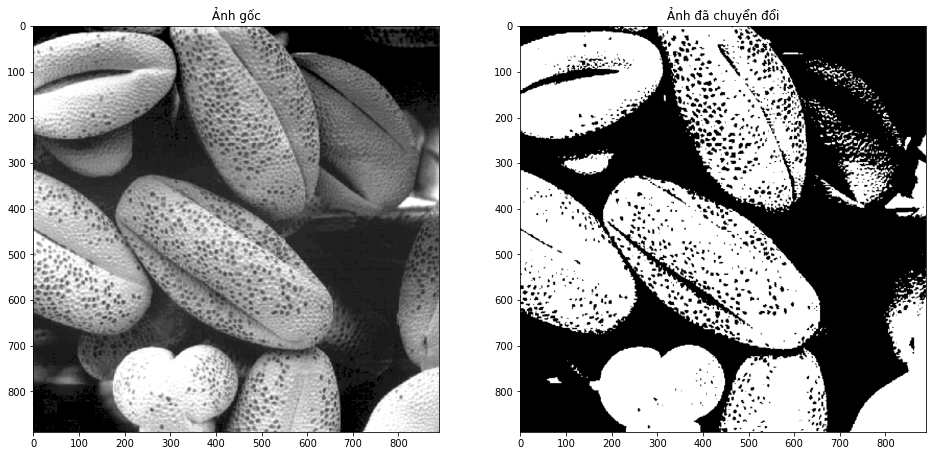

In [ ]:
show_anh_cat_nguong()

**Chuyển đổi logarit**: cải thiện ảnh tốt hơn, rõ nét hơn

In [ ]:
def chuyenDoiLogarit(img,c):
    return float(c) * cv.log(1.0 + img)

def show_anh_Logarit():
    fig = plt.figure(figsize=(16, 9))
    ax1, ax2 = fig.subplots(1, 2)

    img = cv.imread('log.tif',0)
    ax1.imshow(img, cmap='gray')
    ax1.set_title("Ảnh gốc")

    y = chuyenDoiLogarit(img,2)
    ax2.imshow(y, cmap='gray')
    ax2.set_title("Ảnh đã chuyển đổi")
    plt.show()

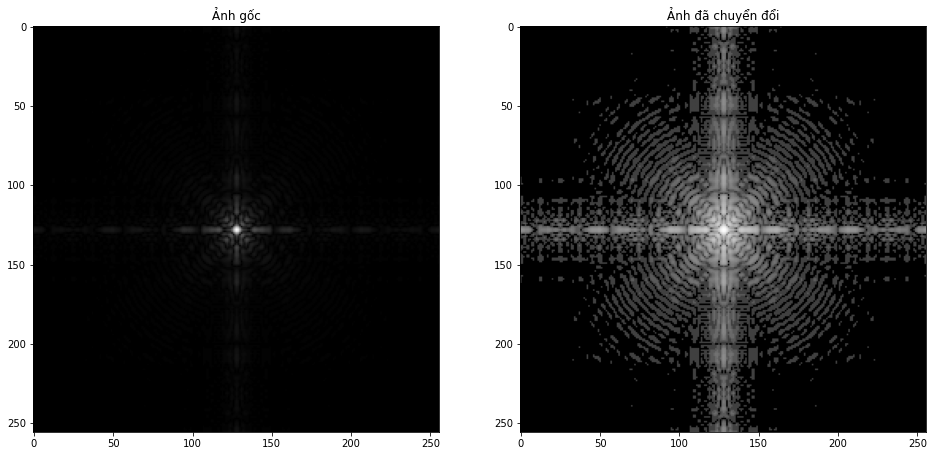

In [ ]:
show_anh_Logarit()

**Chuyển đối Gama**: cải thiện ảnh tốt hơn, rõ nét hơn

In [ ]:
def Chuyen_Doi_Gamma(img, gamma, c):
    return float(c) * pow(img, float(gamma))

def show_Chuyen_Doi_Gamma():
    fig = plt.figure(figsize=(16, 9))
    (ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

    img = cv.imread('sanbay.tif',0)
    ax1.imshow(img, cmap='gray')
    ax1.set_title("ảnh gốc")

    y1 = Chuyen_Doi_Gamma(img, 3.0, 1.0)
    ax2.imshow(y1, cmap='gray')
    ax2.set_title("gamma=3")

    y2 = Chuyen_Doi_Gamma(img, 4.0, 1.0)
    ax3.imshow(y2, cmap='gray')
    ax3.set_title("gamma=4")

    y3 = Chuyen_Doi_Gamma(img, 5.0, 1.0)
    ax4.imshow(y3, cmap='gray')
    ax4.set_title("gamma=5")
    plt.show()


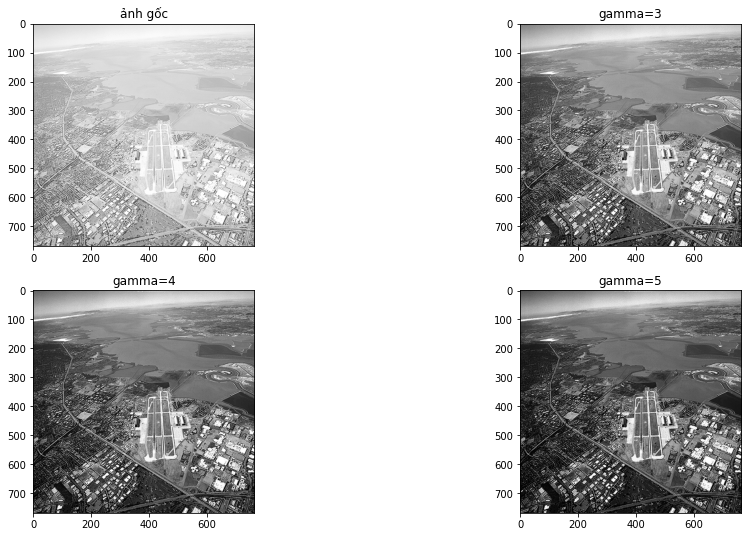

In [ ]:
show_Chuyen_Doi_Gamma()

**Cắt mức xám**: Chuyển đổi ảnh mức xám thành ảnh nhị phân.

In [ ]:
def cat_muc_xam():
    fig = plt.figure(figsize=(16, 9))
    ax1, ax2 = fig.subplots(1, 2)
    # Load the image
    img = cv.imread('dolar.tif',0)

    ax1.imshow(img, cmap='gray')
    ax1.set_title("Ảnh gốc")

    #  Find width and height of image
    row, column = img.shape

    #  Create an zeros array to store the sliced image
    img1 = np.zeros((row,column),dtype = 'uint8')
    #  Specify the min and max range
    min_range = 10

    max_range = 60
    #  Loop over the input image and if pixel value lies in desired range set it to 255 otherwise set it to 0.
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range: img1[i,j] = 255
            else: img1[i,j] = 0

    #  Display the image
    ax2.imshow(img1, cmap='gray')
    ax2.set_title("Ảnh đã chuyển đổi")
    plt.show()

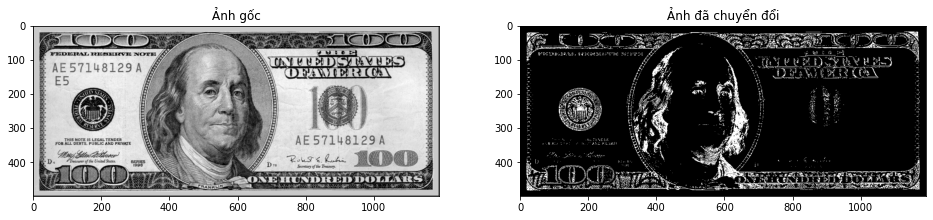

In [ ]:
cat_muc_xam()

**Cắt mặt phẳng bit**: chia ảnh đa cấp xám thành ảnh nhị phân

In [ ]:
def cat_mp_bit():
    plt.rcParams['font.size'] = 10
    img = cv.imread('dolar.tif',0)

    lst = []
    for i in range(img.shape[0]): #duyệt qua hàng img
        for j in range(img.shape[1]): #duyệt cột img
            lst.append(np.binary_repr(img[i][j],width=8)) # width số bit
    # Đã có 1 danh sách chứa chuỗi các bit
    # Để tạo ra các mặt phẳng bit chúng ta lặp qua các phần tử chuỗi các bit
    # Rút trích nó là lưu vào từng danh sách (mỗi danh sách là mặt phẳng bit)

    #Rút trích thành mặt phẳng bit thứ 8
    mp_bit_8 =[]
    for i in lst:
        mp_bit_8.append(int(i[0]))

    #Rút trích thành mặt phẳng bit thứ 7
    mp_bit_7 =[]
    for i in lst:
        mp_bit_7.append(int(i[1]))

    #Rút trích thành mặt phẳng bit thứ 6
    mp_bit_6 =[]
    for i in lst:
        mp_bit_6.append(int(i[2]))

    #Rút trích thành mặt phẳng bit thứ 5
    mp_bit_5 =[]
    for i in lst:
        mp_bit_5.append(int(i[3]))

    #Rút trích thành mặt phẳng bit thứ 4
    mp_bit_4 =[]
    for i in lst:
        mp_bit_4.append(int(i[4]))

    #Rút trích thành mặt phẳng bit thứ 3
    mp_bit_3 =[]
    for i in lst:
        mp_bit_3.append(int(i[5]))

    #Rút trích thành mặt phẳng bit thứ 2
    mp_bit_2 =[]
    for i in lst:
        mp_bit_2.append(int(i[6]))

    #Rút trích thành mặt phẳng bit thứ 1
    mp_bit_1 =[]
    for i in lst:
        mp_bit_1.append(int(i[7]))

    # Tái tạo ảnh
    # Nhân từng phần tử với 2^(n-1) để có ảnh tái tạo tương ứng với mỗi mặt phẳng bit
    # n là bit thứ n
    image_bit_8 = (np.array(mp_bit_8,dtype='uint8')*128).reshape(img.shape[0],img.shape[1])
    image_bit_7 = (np.array(mp_bit_7,dtype='uint8')*64).reshape(img.shape[0],img.shape[1])
    image_bit_6 = (np.array(mp_bit_6,dtype='uint8')*32).reshape(img.shape[0],img.shape[1])
    image_bit_5 = (np.array(mp_bit_5,dtype='uint8')*16).reshape(img.shape[0],img.shape[1])
    image_bit_4 = (np.array(mp_bit_4,dtype='uint8')*8).reshape(img.shape[0],img.shape[1])
    image_bit_3 = (np.array(mp_bit_3,dtype='uint8')*4).reshape(img.shape[0],img.shape[1])
    image_bit_2 = (np.array(mp_bit_2,dtype='uint8')*2).reshape(img.shape[0],img.shape[1])
    image_bit_1 = (np.array(mp_bit_1,dtype='uint8')*1).reshape(img.shape[0],img.shape[1])

    #Tạo vùng vẽ tỷ lệ 16:9
    fig = plt.figure(figsize=(16, 9))
    #Tạo 9 vùng vẽ con, phân bố 3 hàng 3 cột
    (ax1, ax2, ax3), (ax4,ax5, ax6),(ax7, ax8, ax9) = fig.subplots(3, 3)

    #Vẽ ảnh gốc
    ax1.imshow(img, cmap='gray')
    ax1.set_title("ảnh gốc")

    #Vẽ ảnh bit thứ 8
    ax2.imshow(image_bit_8, cmap='gray')
    ax2.set_title("Mặt phẳng bit 8")

    #Vẽ ảnh bit thứ 7
    ax3.imshow(image_bit_7, cmap='gray')
    ax3.set_title("Mặt phẳng bit 7")

    #Vẽ ảnh bit thứ 6
    ax4.imshow(image_bit_6, cmap='gray')
    ax4.set_title("Mặt phẳng bit 6")

    #Vẽ ảnh bit thứ 5
    ax5.imshow(image_bit_5, cmap='gray')
    ax5.set_title("Mặt phẳng bit 5")

    #Vẽ ảnh bit thứ 4
    ax6.imshow(image_bit_4, cmap='gray')
    ax6.set_title("Mặt phẳng bit 4")

    #Vẽ ảnh bit thứ 3
    ax7.imshow(image_bit_3, cmap='gray')
    ax7.set_title("Mặt phẳng bit 3")

    #Vẽ ảnh bit thứ 2
    ax8.imshow(image_bit_2, cmap='gray')
    ax8.set_title("Mặt phẳng bit 2")

    #Vẽ ảnh bit thứ 1
    ax9.imshow(image_bit_1, cmap='gray')
    ax9.set_title("Mặt phẳng bit 1")
    plt.show() # Hiển thị vùng vẽ ảnh

    # Tái tạo ảnh từ việc kết hợp nhiều mặt phẳng bit
    #Tạo vùng vẽ tỷ lệ 16:9
    fig1 = plt.figure(figsize=(16, 9))
    #Tạo 4 vùng vẽ con, phân bố 2 hàng 2 cột
    (bx1, bx2), (bx3, bx4) = fig1.subplots(2, 2)
    #Vẽ ảnh gốc
    bx1.imshow(img, cmap='gray')
    bx1.set_title("ảnh gốc")

    #Vẽ ảnh bit thứ 8 và bít thứ 7
    bx2.imshow(image_bit_8 + image_bit_7, cmap='gray')
    bx2.set_title("Mặt phẳng bit 8 và bit 7")

    #Vẽ ảnh bit thứ 8, bít thứ 7 và bít thứ 6
    bx3.imshow(image_bit_8 + image_bit_7+ image_bit_6, cmap='gray')
    bx3.set_title("Mặt phẳng bit 8, bit 7 và bit 6")

    #Vẽ ảnh bit thứ 7, bít thứ 6 và bít thứ 5
    bx4.imshow(image_bit_7 + image_bit_6+ image_bit_5, cmap='gray')
    bx4.set_title("Mặt phẳng bit 7, bit 6 và bit 5")

    plt.show() # Hiển thị vùng vẽ ảnh

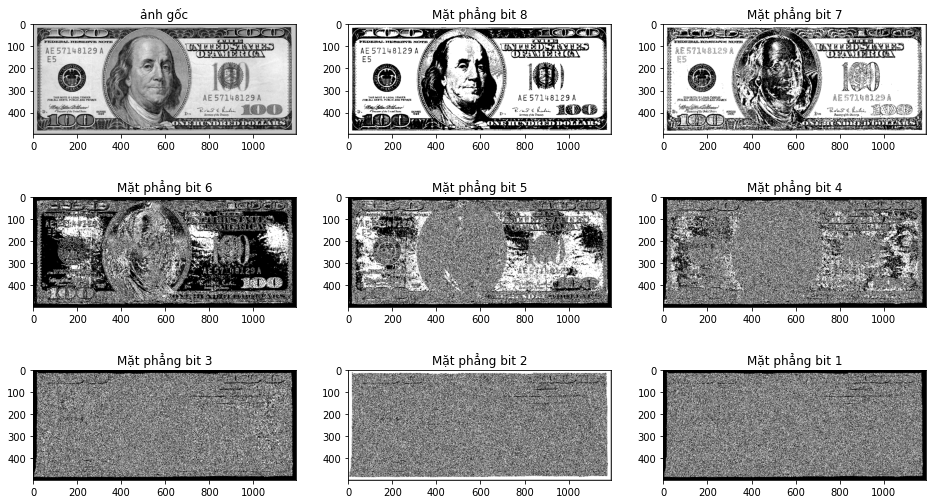

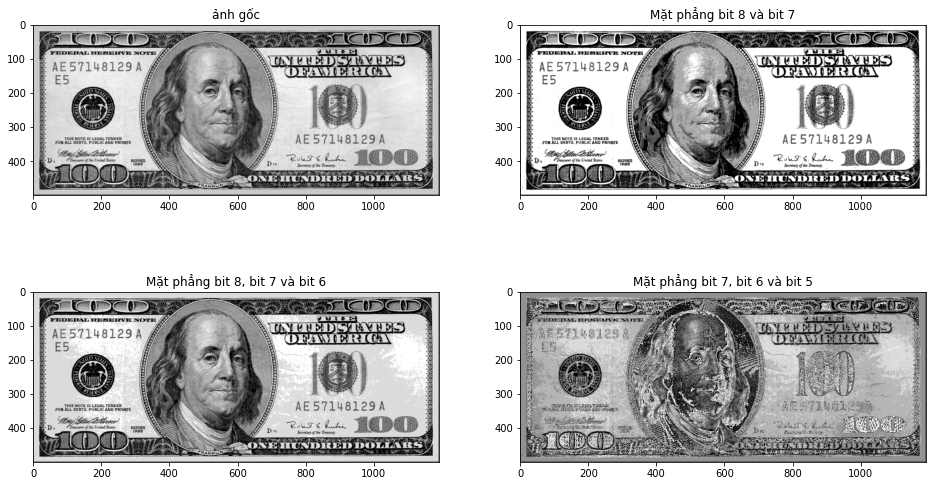

In [ ]:
cat_mp_bit()

**Ảnh histogram**: phan bố mức xám của ảnh

tối: trái, sáng: phải, tháp: k đều, cao: đều

In [ ]:
def histogram():
    img = cv.imread('hist.jpg',0) # mở file ảnh
    img_equal = cv.equalizeHist(img) #hàm cân bằng ảnh

    fig = plt.figure(figsize=(16,9))
    (ax1,ax2), (ax3,ax4) = fig.subplots(2,2)

    #vẽ ảnh gốc ax1
    ax1.imshow(img, cmap='gray')
    ax1.set_title("Ảnh gốc")

    ax2.hist(img)
    ax2.set_title("Histogram ảnh gốc")

    ax3.imshow(img_equal, cmap='gray')
    ax3.set_title("Ảnh cân bằng histogram")

    #vẽ hist ảnh cân bằng
    ax4.hist(img_equal)
    ax4.set_title("Histogram ảnh cân bằng")

    plt.show()

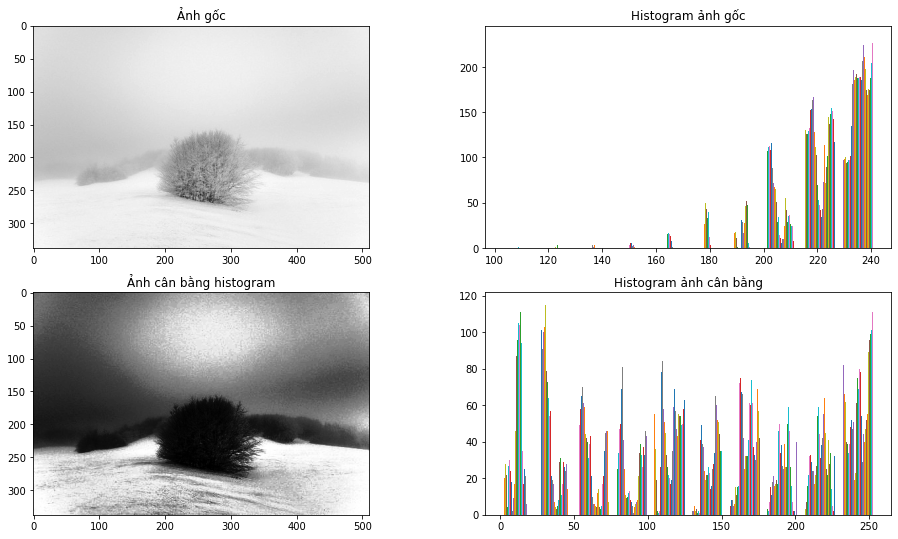

In [ ]:
histogram()